In [1]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
library(mosaicData)

In [3]:
help(Utilities)

In [4]:
head(Utilities)

,month,day,year,temp,kwh,ccf,thermsPerDay,billingDays,totalbill,gasbill,elecbill,notes
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,12,29,1999,26,892,194,5.5,36,173.65,112.72,68.25,
2,1,28,2000,18,533,164,5.6,30,139.18,95.88,43.30,
3,2,26,2000,24,521,228,8.0,29,177.48,134.65,42.83,
4,3,25,2000,41,554,16,0.6,28,61.27,15.32,45.95,bad meter reading
5,4,28,2000,45,638,74,2.2,34,100.33,47.33,53.00,
6,5,30,2000,60,700,129,4.1,32,153.32,89.87,63.45,


Question 1 of RP:

In [5]:
cor_ccf_temp <- cor(Utilities$ccf, Utilities$temp)

In [6]:
cor_ccf_temp

[1] -0.9548844

Question 2 of RP:

`geom_smooth()` using formula 'y ~ x'



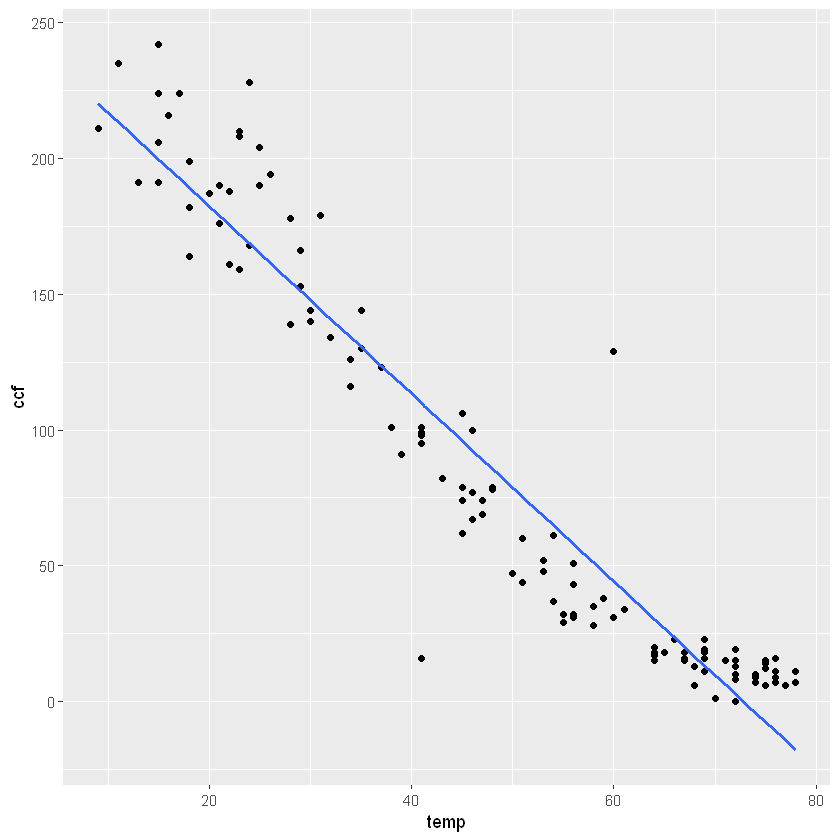

In [7]:
ggplot(Utilities,aes(x = temp,y = ccf))+
    geom_point()+
    geom_smooth(method = 'lm', se = FALSE)

Question 3 of RP:

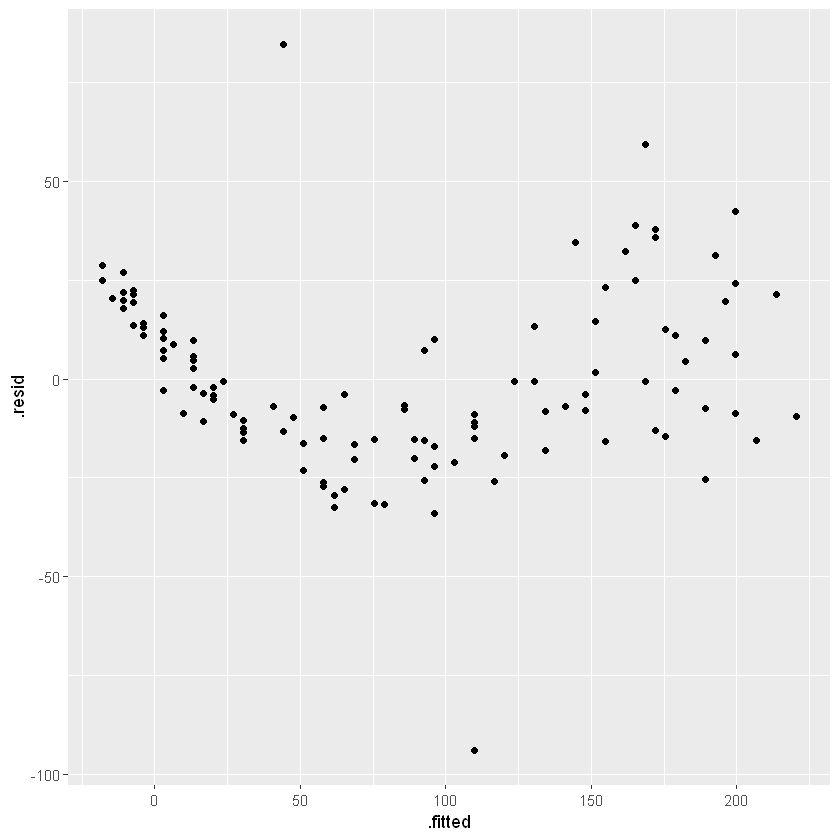

In [8]:
lm(ccf ~ temp, Utilities) %>% 
    ggplot(aes(.fitted, .resid)) + 
    geom_point()

In [9]:
fit <- lm(ccf ~ temp, Utilities)
TempVsCcf <- Utilities %>% select(temp,ccf)
TempVsCcf$predicted <- predict(fit)
TempVsCcf$residuals <- residuals(fit)
head(TempVsCcf)

,temp,ccf,predicted,residuals
,<int>,<int>,<dbl>,<dbl>
1,26,194,161.69516,32.30484
2,18,164,189.32348,-25.32348
3,24,228,168.60224,59.39776
4,41,16,109.89206,-93.89206
5,45,74,96.07791,-22.07791
6,60,129,44.27481,84.72519


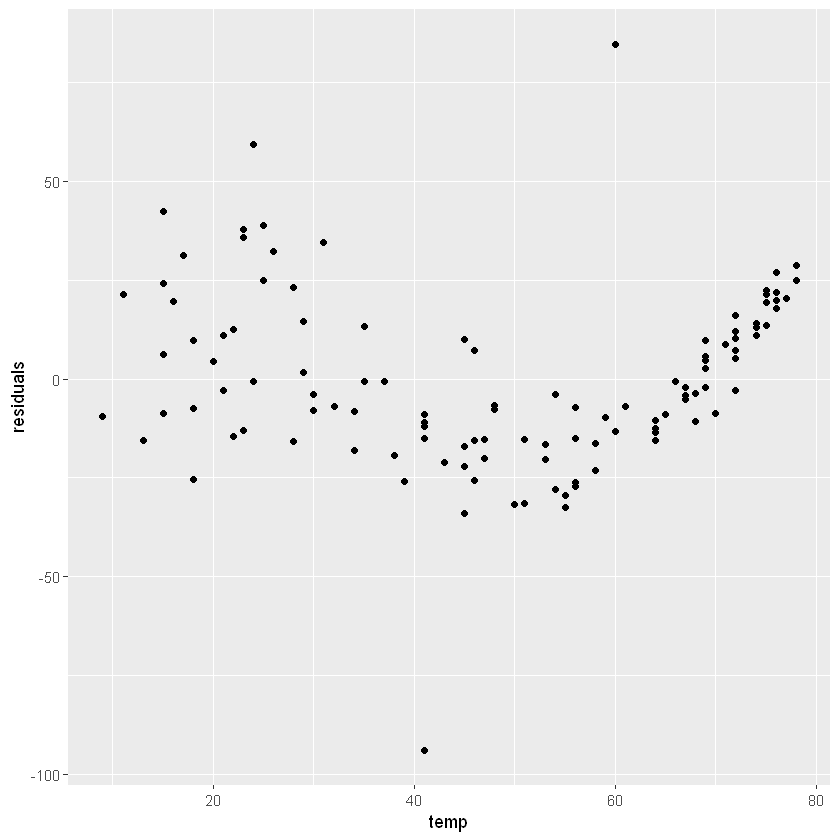

In [10]:
ggplot(TempVsCcf,aes(x=temp, y=residuals)) + 
    geom_point()

Question 4 of RP:
87 ccf if we use linear model to predict the gas usage when the temperature is 47 degrees.

Question 1 of Project 5:

In [11]:
stocks <- read_csv("AMC_GME.csv")


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Date = col_character(),
  AMC_Open = col_double(),
  GME_Open = col_double(),
  AMC_High = col_double(),
  GME_High = col_double(),
  AMC_Low = col_double(),
  GME_Low = col_double(),
  AMC_Close = col_double(),
  GME_Close = col_double(),
  AMC_Volume = col_double(),
  GME_Volume = col_double()
)




Question 2 of Project 5:

In [12]:
cor_GME_AMC <- cor(stocks$GME_Open, stocks$AMC_Open)

In [13]:
cor_GME_AMC

[1] 0.958565

In [14]:
lm(AMC_Open ~ GME_Open, stocks)


Call:
lm(formula = AMC_Open ~ GME_Open, data = stocks)

Coefficients:
(Intercept)     GME_Open  
    1.46678      0.04491  


y = (0.04491)x + 1.46678
(y - AMC_Open)
(x - GME_Open)

In [15]:
summary(lm(AMC_Open ~ GME_Open, stocks))$r.squared

[1] 0.9188468

Interpretation: The calculations tell me that the two stocks are correlated since the coefficient of determination and the correlation are close to 1, ~.91 and ~.95

Question 3 of Project 5:

In [16]:
fit <- lm(AMC_Open ~ GME_Open, stocks)
GMEVsAMC <- stocks %>% select(GME_Open,AMC_Open)
GMEVsAMC$predicted <- predict(fit)
GMEVsAMC$residuals <- residuals(fit)
head(GMEVsAMC)

GME_Open,AMC_Open,predicted,residuals
<dbl>,<dbl>,<dbl>,<dbl>
19.00,2.20,2.319980,-0.1199799
17.35,1.99,2.245887,-0.2558866
17.34,2.03,2.245438,-0.2154375
18.47,2.08,2.296180,-0.2161802
18.18,2.09,2.283158,-0.1931577
19.41,2.16,2.338391,-0.1783909


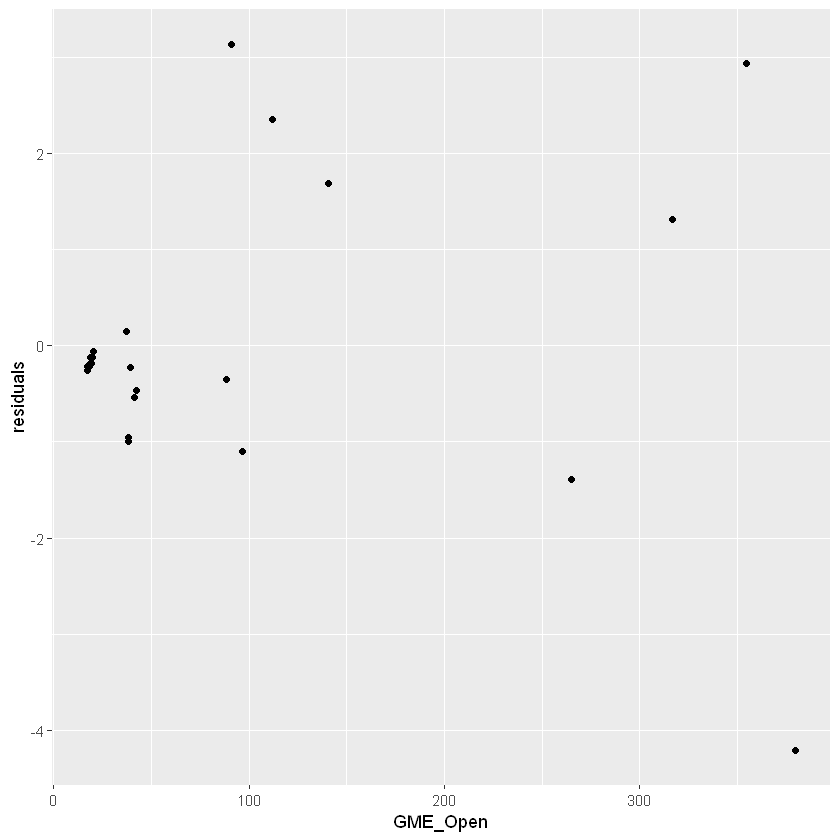

In [67]:
ggplot(GMEVsAMC,aes(x=GME_Open, y=residuals)) + 
    geom_point()

Explanation: I do think the linear model captures the full relationship because the residual plot expresses no pattern. Therefore, the linear model captures a good relationship between the two stock openings.

Question 4 of Project 5:

`geom_smooth()` using formula 'y ~ x'



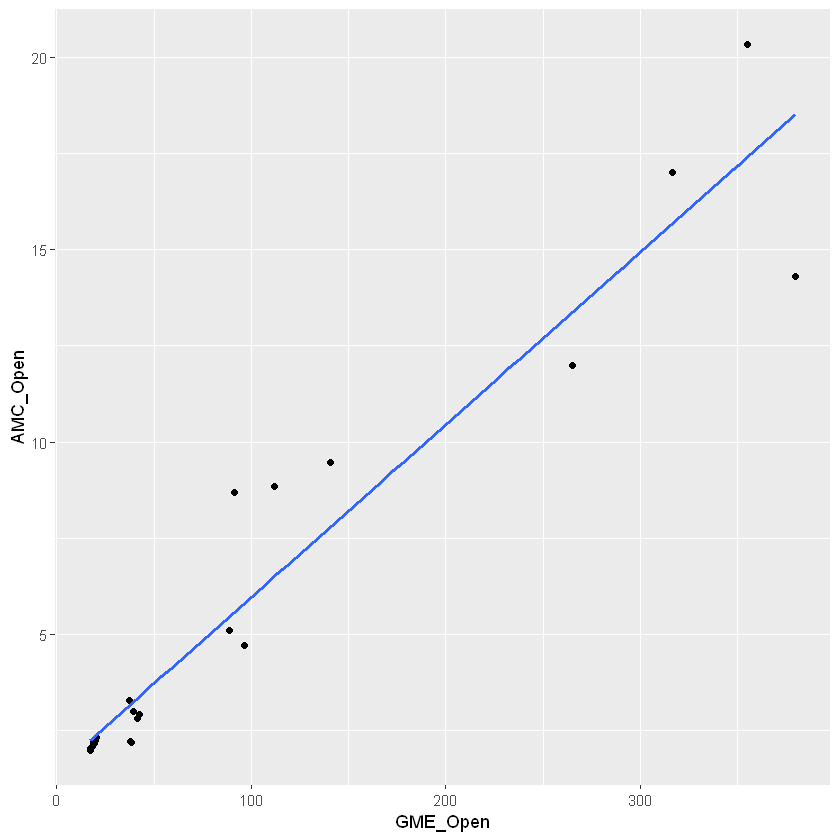

In [18]:
ggplot(stocks,aes(x = GME_Open,y = AMC_Open))+
    geom_point()+
    geom_smooth(method = 'lm', se = FALSE)

In [30]:
model_summary<-summary(lm(AMC_Open ~ GME_Open, stocks))

In [54]:
ms <- (7 - model_summary$coefficients[1])/model_summary$coefficients[2] 

In [55]:
ms

[1] 123.2204

If the opening rate for AMC is 7 dollars is the predicted opening rate for GME is 123.22 dollars

Question 5 of Project 5:

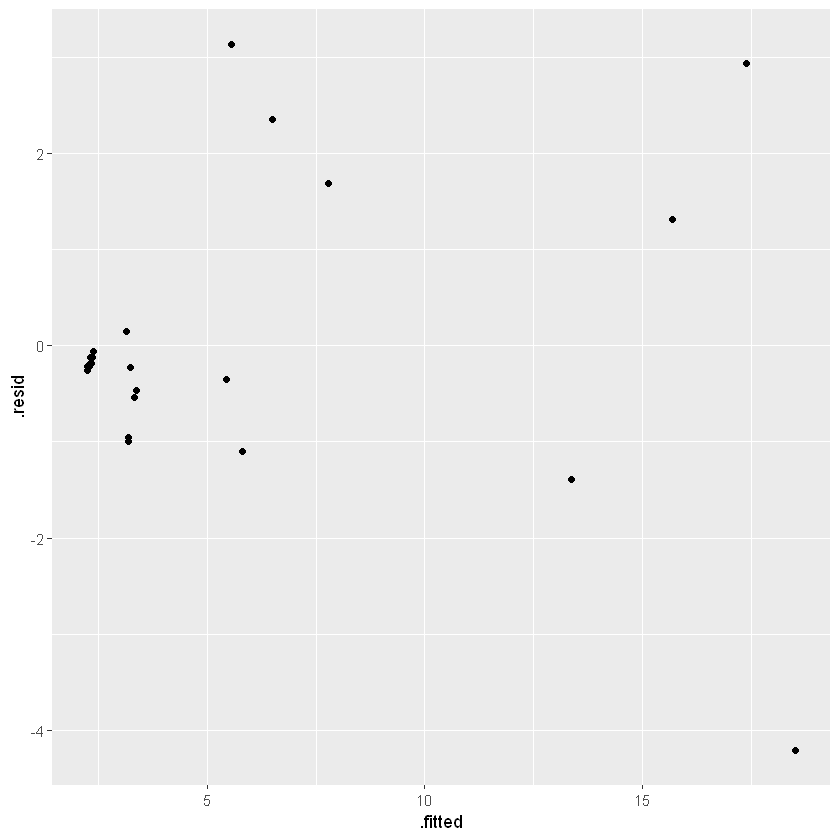

In [19]:
lm(AMC_Open ~ GME_Open, stocks) %>% 
    ggplot(aes(.fitted, .resid)) + 
    geom_point()

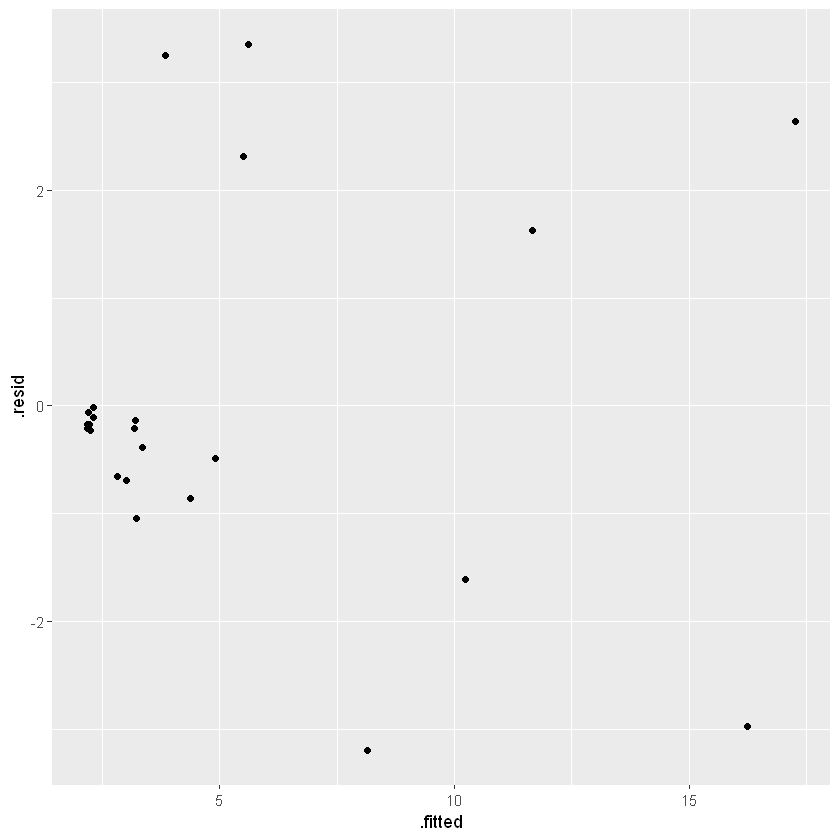

In [20]:
lm(AMC_Close ~ GME_Close, stocks) %>% 
    ggplot(aes(.fitted, .resid)) + 
    geom_point()

Explanation: I do think the linear model captures the relationship since there is no clear pattern so the residual plot seems to be mostly noise. The coefficient of determination is also pretty high at .91.

Question 6 of Project 5:

In [21]:
help(mutate)

In [22]:
summary(stocks$AMC_Volume)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
2.615e+07 4.382e+07 1.630e+08 2.564e+08 4.389e+08 1.222e+09 

In [65]:
stocks <- stocks %>%
    mutate(
        stockgrp = cut(AMC_Volume,
                       breaks = c(2.615e+06,
                                 4.382e+07,
                                 1.630e+08,
                                 4.389e+08,
                                 1.222e+10
                                 ),
                       labels = c()
    ))

`geom_smooth()` using formula 'y ~ x'



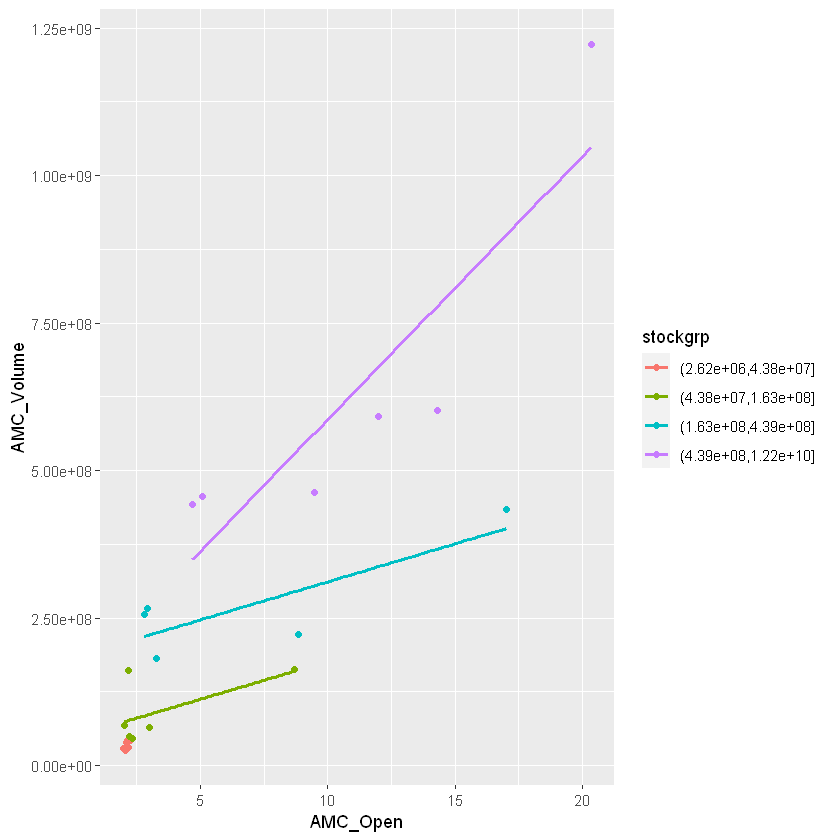

In [66]:
ggplot(stocks,aes(x = AMC_Open,y = AMC_Volume))+
    geom_point(aes(color=stockgrp))+
    geom_smooth(method = 'lm',aes(color=stockgrp), se = FALSE)

What might explain the differences in the models is the average volume of AMC stock trading daily, as the volume of stocks increase, the price also increases.